## Problem Statement:Sentiment Prediction
The notebook presents the solution and approaches and comaparisons there of for a sentiment prediction problem. Various vectorization methods and machine learning models are compared.

Data Description

TRAIN.csv

It contains the training data with review details as described below

Data Dictionary
Variable Description

id----Unique identifier for each tuple

category----The reviews have been categorized into two categories representing positive and negative reviews. 0 represents positive reviews and 1 represents negative reviews.

text-----Tokenized text content of the review

TEST.csv

It has review details for which to predict whether category would be positive or negative

RESULTS:
accuracy: 0.9654 with keras


In [137]:
#Import libraries
# For notebook plotting
%matplotlib inline

# Standard packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [138]:
#import skipthoughts
#https://monkeylearn.com/blog/beginners-guide-text-vectorization/

In [139]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [140]:
# sklearn for preprocessing and machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics  import accuracy_score
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [141]:
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier,RandomForestRegressor
from xgboost import XGBClassifier                                      
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [142]:
from smart_open import smart_open
from gensim.models import Word2Vec    #Import gensim Word2Fec
from sklearn.decomposition import PCA #Grab PCA functions

In [143]:
!pwd

/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Colab Notebooks


In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
!pwd

/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Colab Notebooks


In [146]:
!ls


'Copy of intro_to_colab.ipynb'	 intro_to_colab.ipynb   TRAIN.csv
'Copy of sentiment.ipynb'	 sentiment.ipynb        v1b.ipynb
'Copy of w2v.ipynb'		 TEST.csv
'Copy of intro_to_colab.ipynb'	 intro_to_colab.ipynb   TRAIN.csv
'Copy of sentiment.ipynb'	 sentiment.ipynb        v1b.ipynb
'Copy of w2v.ipynb'		 TEST.csv


In [147]:
!cd drive

/bin/bash: line 0: cd: drive: No such file or directory
/bin/bash: line 0: cd: drive: No such file or directory


In [148]:
cd MyDrive/

[Errno 2] No such file or directory: 'MyDrive/'
/content/drive/My Drive/Colab Notebooks
[Errno 2] No such file or directory: 'MyDrive/'
/content/drive/My Drive/Colab Notebooks


In [149]:
cd Colab\ Notebooks


[Errno 2] No such file or directory: 'Colab Notebooks'
/content/drive/My Drive/Colab Notebooks
[Errno 2] No such file or directory: 'Colab Notebooks'
/content/drive/My Drive/Colab Notebooks


In [150]:
!ls     # we are at the correct directory

'Copy of intro_to_colab.ipynb'	 intro_to_colab.ipynb   TRAIN.csv
'Copy of sentiment.ipynb'	 sentiment.ipynb        v1b.ipynb
'Copy of w2v.ipynb'		 TEST.csv
'Copy of intro_to_colab.ipynb'	 intro_to_colab.ipynb   TRAIN.csv
'Copy of sentiment.ipynb'	 sentiment.ipynb        v1b.ipynb
'Copy of w2v.ipynb'		 TEST.csv


In [151]:
df = pd.read_csv('./TRAIN.csv')

In [152]:
df.head()

,id,text,category
0,3973,1047 6700 4178 2912 183 6700,0
1,4462,4035 4563 1994 154 5373 4956 6035 4393 4017 40...,1
2,2889,5035 7685 3139 4407 254 584 6589 8518 3078,0
3,3457,1047 2540 2578 6700 2242 230 3771 4676 5881 64...,0
4,1555,7685 5868 237 6794 3078,0


,id,text,category
0,3973,1047 6700 4178 2912 183 6700,0
1,4462,4035 4563 1994 154 5373 4956 6035 4393 4017 40...,1
2,2889,5035 7685 3139 4407 254 584 6589 8518 3078,0
3,3457,1047 2540 2578 6700 2242 230 3771 4676 5881 64...,0
4,1555,7685 5868 237 6794 3078,0


In [153]:
#Check for nulls
df.isna().sum()

id          0
text        0
category    0
dtype: int64

id          0
text        0
category    0
dtype: int64

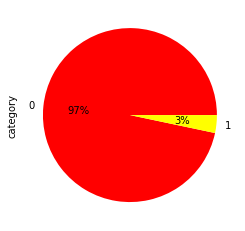

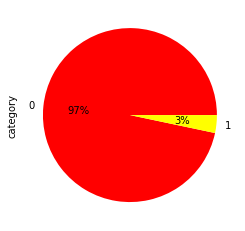

In [154]:
# check the distribution
df.category.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

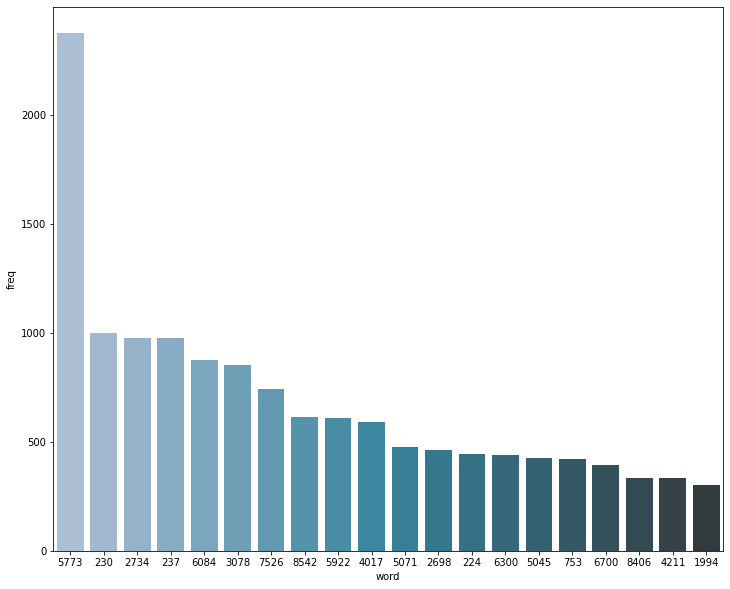

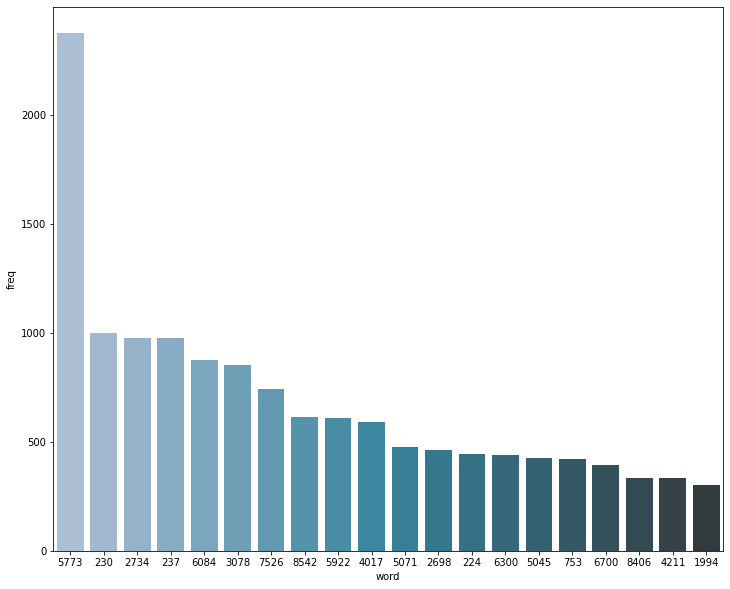

In [155]:
# lets look at the word distribution
import collections
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
bow = cv.fit_transform(df['text'])
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();


#Pre-processing Tweets

In [156]:
# Generic method that can be used as needed
def preprocess_text(txt):
    txt.lower()
    # Remove urls
    ##txt = re.sub(r"http\S+|www\S+|https\S+", '', twxt, flags=re.MULTILINE) -- not needed for this problem
    # Remove user @ references and '#' from text
    ##txt = re.sub(r'\@\w+|\#','', txt)                                     -- no need for this problem  
    # Remove punctuations
    ##txt = txt.translate(str.maketrans('', '', string.punctuation))        -- no need for this problem   
    # Remove stopwords
    txt_tokens = word_tokenize(txt)   
    filtered_words = [w for w in txt_tokens] 
    
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)

# Vectorizing Data           
# Lets try TfidfVectorizer

In [157]:
#as a function
def get_feature_vector(train_fit):         
    vector = TfidfVectorizer(strip_accents = "unicode", stop_words = "english")
    #vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

In [158]:
#Check
n = df.iloc[:, 1]
n.head()

0                         1047 6700 4178 2912 183 6700
1    4035 4563 1994 154 5373 4956 6035 4393 4017 40...
2           5035 7685 3139 4407 254 584 6589 8518 3078
3    1047 2540 2578 6700 2242 230 3771 4676 5881 64...
4                              7685 5868 237 6794 3078
Name: text, dtype: object

0                         1047 6700 4178 2912 183 6700
1    4035 4563 1994 154 5373 4956 6035 4393 4017 40...
2           5035 7685 3139 4407 254 584 6589 8518 3078
3    1047 2540 2578 6700 2242 230 3771 4676 5881 64...
4                              7685 5868 237 6794 3078
Name: text, dtype: object

In [159]:
#Check
n = df.iloc[:, 1]
n.head()

0                         1047 6700 4178 2912 183 6700
1    4035 4563 1994 154 5373 4956 6035 4393 4017 40...
2           5035 7685 3139 4407 254 584 6589 8518 3078
3    1047 2540 2578 6700 2242 230 3771 4676 5881 64...
4                              7685 5868 237 6794 3078
Name: text, dtype: object

0                         1047 6700 4178 2912 183 6700
1    4035 4563 1994 154 5373 4956 6035 4393 4017 40...
2           5035 7685 3139 4407 254 584 6589 8518 3078
3    1047 2540 2578 6700 2242 230 3771 4676 5881 64...
4                              7685 5868 237 6794 3078
Name: text, dtype: object

In [160]:
# Impoirt other libraries
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier,GradientBoostingClassifier#StackingC#lassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier,RidgeClassifierCV,SGDClassifier,LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


#Modelling

In [161]:
#vectorization,splitting data
tf_vector = get_feature_vector(np.array(df.iloc[:, 1]).ravel())
X = tf_vector.transform(np.array(df.iloc[:, 1]).ravel())
y = np.array(df.iloc[:, 2]).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)


In [162]:
#Model
NB_model = RidgeClassifierCV()#RandomForestClassifier()
NB_model.fit(X_train, y_train)
y_predict_nb = NB_model.predict(X_test)
#print('test...',y_test)
#print('predict...',y_predict_nb)
print('accuracy',accuracy_score(y_test, y_predict_nb))
print("F1 Score = " ,f1_score(y_test, y_predict_nb,average='macro'))

accuracy 0.9923076923076923
F1 Score =  0.9146981627296588
accuracy 0.9923076923076923
F1 Score =  0.9146981627296588


# Results with TfidfVectorizer


PassiveAggressiveClassifier:

('accuracy', 0.9942307692307693)
('F1 Score = ', 0.9385221674876847)

MLPClassifier:

('accuracy', 0.9942307692307693)
('F1 Score = ', 0.9385221674876847)

SGDClassifier:

  ('accuracy', 0.9942307692307693)
('F1 Score = ', 0.9385221674876847)  
LogisticRegressionCV:            
   [same result with all-solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’]

('accuracy', 0.9942307692307693)
('F1 Score = ', 0.9385221674876847)

RidgeClassifierCV:

   ('accuracy', 0.9923076923076923)
('F1 Score = ', 0.9146981627296588)
LinearSVC :

('accuracy', 0.9903846153846154)
('F1 Score = ', 0.8888461374032748)
KNeighborsClassifier:

 ('accuracy', 0.9903846153846154)
('F1 Score = ', 0.8888461374032748)

RidgeClassifier:

('accuracy', 0.9903846153846154)
('F1 Score = ', 0.8888461374032748)

GradientBoostingClassifier:

('accuracy', 0.9884615384615385)
('F1 Score = ', 0.8720472440944882)
BaggingClassifier:

('accuracy', 0.9865384615384616)
('F1 Score = ', 0.856551724137931)

DecisionTreeClassifier:

('accuracy', 0.9826923076923076)
('F1 Score = ', 0.8403765476312288)

ExtraTreesClassifier:

('accuracy', 0.9846153846153847)
('F1 Score = ', 0.8142525450973388)

RandomForestClassifier:

('accuracy', 0.9826923076923076)
('F1 Score = ', 0.758750451054178)

LogisticRegression:

('accuracy', 0.9730769230769231)
('F1 Score = ', 0.49317738791423)
BernoulliNB:

('accuracy', 0.9730769230769231)
('F1 Score = ', 0.49317738791423)
MultinomialNB:

('accuracy', 0.9730769230769231)
('F1 Score = ', 0.49317738791423)

#PassiveAggressiveClassifier, MLPClassifier, SGDClassifier, LogisticRegressionCV are giving the higest F_score

# Lets try CountVectorizer

In [163]:
#new vectorization function
def get_feature_vector_cv(train_fit):         
    #vector = Word2Vec(train_fit, min_count=1)
    vector=  CountVectorizer(analyzer='word')
    vector.fit(train_fit)
    return vector


In [164]:
#pre-procecss, data transformation
tf_vector = get_feature_vector_cv(np.array(df.iloc[:, 1]).ravel())
X = tf_vector.transform(np.array(df.iloc[:, 1]).ravel())
y = np.array(df.iloc[:, 2]).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)


Modelling

In [165]:
# Training 
model = LogisticRegression()#RandomForestClassifier()
model.fit(X_train, y_train)
y_predict_nb = model.predict(X_test)
#print('test...',y_test)
#print('predict...',y_predict_nb)
print('accuracy',accuracy_score(y_test, y_predict_nb))
print("F1 Score = " ,f1_score(y_test, y_predict_nb,average='macro'))

accuracy 0.9923076923076923
F1 Score =  0.9146981627296588
accuracy 0.9923076923076923
F1 Score =  0.9146981627296588


Results with CountVectorizer

PassiveAggressiveClassifier:

('accuracy', 0.9923076923076923)
('F1 Score = ', 0.9146981627296588)

MLPClassifier:
('accuracy', 0.9923076923076923)
('F1 Score = ', 0.9146981627296588)

SGDClassifier:
('accuracy', 0.9884615384615385)
('F1 Score = ', 0.8898927159796726)

LogisticRegressionCV:               [same result with all-solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’]

('accuracy', 0.9942307692307693)
('F1 Score = ', 0.9385221674876847) [ Same for tfidf and count]

RidgeClassifierCV:

('accuracy', 0.9942307692307693)
('F1 Score = ', 0.9385221674876847)
LinearSVC :

('accuracy', 0.9923076923076923)
('F1 Score = ', 0.9211045364891519)
KNeighborsClassifier:

('accuracy', 0.9730769230769231)
('F1 Score = ', 0.49317738791423)
RidgeClassifier:

('accuracy', 0.9730769230769231)
('F1 Score = ', 0.49317738791423)
GradientBoostingClassifier:

   ('accuracy', 0.9826923076923076)
('F1 Score = ', 0.7999230473258946)
BaggingClassifier:

('accuracy', 0.9807692307692307)
('F1 Score = ', 0.7678156813716734)
DecisionTreeClassifier:

('accuracy', 0.9807692307692307)
('F1 Score = ', 0.8283828382838283)
ExtraTreesClassifier:

('accuracy', 0.9846153846153847)
('F1 Score = ', 0.7960784313725491)
RandomForestClassifier:

('accuracy', 0.9769230769230769)
('F1 Score = ', 0.619140625)

LogisticRegression:                     
('accuracy', 0.9942307692307693)
('F1 Score = ', 0.9385221674876847)

BernoulliNB:

('accuracy', 0.9730769230769231)
('F1 Score = ', 0.49317738791423)

MultinomialNB:

('accuracy', 0.9826923076923076)
('F1 Score = ', 0.8591676446691342)    


# RidgeClassifierCV LogisticRegressionCV,LogisticRegression are giving the higest F_score with CountVectorization

## LETS try with the test data


In [166]:
df_test = pd.read_csv('./TEST.csv')

In [167]:
df_test.head()

,id,text
0,1546,5222 7526 427 4829 7526 1164 4768 997 7924 332...
1,2956,590 983 5773 8352 1803 237 5045 6300 6267 5773...
2,4248,5915 4871 2982 6310 2734 3581 5773 6498 5773
3,4403,5435 1994 7248 1944 4017 3567 8618 5018 6619 3...
4,2097,6666 230 4768 2684 5773 3656 907 5922 2295 577...


,id,text
0,1546,5222 7526 427 4829 7526 1164 4768 997 7924 332...
1,2956,590 983 5773 8352 1803 237 5045 6300 6267 5773...
2,4248,5915 4871 2982 6310 2734 3581 5773 6498 5773
3,4403,5435 1994 7248 1944 4017 3567 8618 5018 6619 3...
4,2097,6666 230 4768 2684 5773 3656 907 5922 2295 577...


In [169]:
X_tst = tf_vector.transform(np.array(df_test.iloc[:, 1]).ravel())

In [170]:
Y_predict=model.predict(X_tst)

In [171]:
##submission = pd.DataFrame(Y_predict,columns=['category'])
#submission = pd.concat([Id,prediction['y']],1)

#submission.to_csv('../data/submission.csv',index=False)

# LETS try Smote to take care of class imbalance: we will only consider tfTokinzer henceforth.
# And only consider subset of models that are giving better scores.
# PassiveAggressiveClassifier, MLPClassifier, SGDClassifier, LogisticRegressionCV are giving the higest F_score

In [172]:
from imblearn.over_sampling import SMOTE

In [173]:
tf_vector = get_feature_vector(np.array(df.iloc[:, 1]).ravel())
X = tf_vector.transform(np.array(df.iloc[:, 1]).ravel())
y = np.array(df.iloc[:, 2]).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [174]:
#Initialising a SMOTE object
smote = SMOTE(random_state=12,ratio=1.0)

#Sampling the data using SMOTE
X_sample_2, y_sample_2 = smote.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [175]:
#Model
NB_model = LogisticRegressionCV()
NB_model.fit(X_sample_2, y_sample_2)
y_predict_nb = NB_model.predict(X_test)
#print('test...',y_test)
#print('predict...',y_predict_nb)
print('accuracy',accuracy_score(y_test, y_predict_nb))
print("F1 Score = " ,f1_score(y_test, y_predict_nb,average='macro'))

accuracy 0.9942307692307693
F1 Score =  0.9385221674876847


# Try NN model

#Try with word2wec


In [176]:
#https://www.ahmedbesbes.com/blog/sentiment-analysis-with-keras-and-word-2-vec
from copy import deepcopy
from string import punctuation
from random import shuffle

In [177]:
import gensim
from gensim.models.word2vec import Word2Vec # 

In [179]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

from nltk.tokenize import TweetTokenizer # a tweet tokenizer from nltk.
tokenizer = TweetTokenizer()


In [180]:
# function to tokenize
def tokenize(text):
    try:
        text = unicode(tweet.decode('utf-8').lower())
        tokens = tokenizer.tokenize(tweet)
        tokens = filter(lambda t: not t.startswith('@'), tokens)
        tokens = filter(lambda t: not t.startswith('#'), tokens)
        tokens = filter(lambda t: not t.startswith('http'), tokens)
        return tokens
    except:
        return 'NC'

The results of the tokenization should now be cleaned to remove lines with 'NC'

In [181]:
def postprocess(data, n=1000000):
    data = data.head(n)
    data['tokens'] = data['text'].progress_map(tokenize)  ## progress_map is a variant of the map function plus a progress bar. Handy to monitor DataFrame creations.
    data = data[data.tokens != 'NC']
    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)
    return data

In [70]:
df = postprocess(df)

progress-bar: 100%|██████████| 2598/2598 [00:00<00:00, 217875.03it/s]


In [182]:
df.head(5)

,id,text,category
0,3973,1047 6700 4178 2912 183 6700,0
1,4462,4035 4563 1994 154 5373 4956 6035 4393 4017 40...,1
2,2889,5035 7685 3139 4407 254 584 6589 8518 3078,0
3,3457,1047 2540 2578 6700 2242 230 3771 4676 5881 64...,0
4,1555,7685 5868 237 6794 3078,0


In [184]:
#Feed it in the word2vec model
x_train, x_test, y_train, y_test = train_test_split(np.array(df.text),
                                                    np.array(df.category), test_size=0.2)

Before feeding lists of tokens into the word2vec model, we must turn them into LabeledSentence

In [188]:
import gensim
from gensim.models.word2vec import Word2Vec # the word2vec model gensim class
LabeledSentence = gensim.models.doc2vec.LabeledSentence

In [189]:
def labelizeTweets(tweets, label_type):
    labelized = []
    for i,v in tqdm(enumerate(tweets)):
        label = '%s_%s'%(label_type,i)
        labelized.append(LabeledSentence(v, [label]))
    return labelized


In [190]:
x_train = labelizeTweets(x_train, 'TRAIN')
x_test = labelizeTweets(x_test, 'TEST')

0it [00:00, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  """
2078it [00:00, 127189.15it/s]
520it [00:00, 125984.18it/s]


In [191]:
x_train[0]

LabeledSentence(words='7152 7982 6484 3718 3149 3078', tags=['TRAIN_0'])

Each element is basically some object with two attributes: a list (of tokens) and a label.

Now we are ready to build the word2vec model from x_train i.e. the corpus

In [200]:
tweet_w2v = Word2Vec(size=200)
tweet_w2v.build_vocab([x.words for x in tqdm(x_train)])
tweet_w2v.train([x.words for x in tqdm(x_train)],total_examples=tweet_w2v.corpus_count,epochs=tweet_w2v.epochs)

100%|██████████| 2078/2078 [00:00<00:00, 532715.83it/s]


(114731, 1010210)

Once the model is built and trained on the corpus of tweets, we can use it to convert words to vectors. Here's an example

In [203]:
#tweet_w2v['1047']


In [206]:
#print 'building tf-idf matrix ...'
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=10)
matrix = vectorizer.fit_transform([x.words for x in x_train])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print ('vocab size :', len(tfidf))

vocab size : 11


Now let's define a function that, given a list of tweet tokens, creates an averaged tweet vector.



In [207]:
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += tweet_w2v[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError: # handling the case where the token is not
                         # in the corpus. useful for testing.
            continue
    if count != 0:
        vec /= count
    return vec

Now we convert xtrain and and xtest into list of vectors using this function. We also scale each column to have zero mean and unit standard deviation.

In [209]:
from sklearn.preprocessing import scale
train_vecs_w2v = np.concatenate([buildWordVector(z, 200) for z in tqdm(map(lambda x: x.words, x_train))])
train_vecs_w2v = scale(train_vecs_w2v)

test_vecs_w2v = np.concatenate([buildWordVector(z, 200) for z in tqdm(map(lambda x: x.words, x_test))])
test_vecs_w2v = scale(test_vecs_w2v)


0it [00:00, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  

102it [00:00, 1013.77it/s]
225it [00:00, 1067.50it/s]
343it [00:00, 1095.06it/s]
455it [00:00, 1102.17it/s]
586it [00:00, 1156.66it/s]
715it [00:00, 1192.62it/s]
824it [00:00, 1132.71it/s]
950it [00:00, 1167.46it/s]
1074it [00:00, 1184.78it/s]
1204it [00:01, 1215.40it/s]
1324it [00:01, 1119.95it/s]
1437it [00:01, 1095.64it/s]
1547it [00:01, 605.73it/s] 
1662it [00:01, 705.95it/s]
1778it [00:01, 799.53it/s]
1919it [00:01, 918.01it/s]
2078it [00:02, 992.68it/s]

0it [00:00, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  

124it [00:00, 1238.11it/s]
249it [00:00, 1239.39it/s]
381it [00:00, 1260.97it/s]
520it [00:00, 1237.35it/s]


We should now be ready to feed these vectors into a neural network classifier. 
Here is a basic 2-layer architecture.

In [212]:
from keras.models import Sequential
from keras.layers import Activation, Dense
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=200))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_vecs_w2v, y_train, epochs=9, batch_size=32, verbose=2)

Epoch 1/9
65/65 - 1s - loss: 0.1898 - accuracy: 0.9601
Epoch 2/9
65/65 - 0s - loss: 0.1350 - accuracy: 0.9673
Epoch 3/9
65/65 - 0s - loss: 0.1305 - accuracy: 0.9673
Epoch 4/9
65/65 - 0s - loss: 0.1295 - accuracy: 0.9673
Epoch 5/9
65/65 - 0s - loss: 0.1269 - accuracy: 0.9673
Epoch 6/9
65/65 - 0s - loss: 0.1272 - accuracy: 0.9673
Epoch 7/9
65/65 - 0s - loss: 0.1243 - accuracy: 0.9673
Epoch 8/9
65/65 - 0s - loss: 0.1233 - accuracy: 0.9673
Epoch 9/9
65/65 - 0s - loss: 0.1215 - accuracy: 0.9673


Evaluate the model

In [213]:
score = model.evaluate(test_vecs_w2v, y_test, batch_size=128, verbose=2)

5/5 - 0s - loss: 0.1410 - accuracy: 0.9654


In [215]:
submission = pd.DataFrame(Y_predict,columns=['category'])
#submission = pd.concat([Id,prediction['y']],1)

submission.to_csv('./submission.csv',index=False)

RESULTS: accuracy: 0.9654
